In [1]:
# CICIDS2017数据集探索 - Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX

## 导入必要的库
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置更好的图表样式
plt.style.use('ggplot')
sns.set(style="whitegrid")

## 设置数据路径
data_dir = '/root/autodl-tmp/projects/DL/dataset/extracted/MachineLearningCVE'
# 获取所有CSV文件
csv_files = glob(os.path.join(data_dir, "*.csv"))

In [2]:
## 1. 选择文件进行详细分析 - Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX
selected_file = os.path.join(data_dir, "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

def load_and_explore_file(file_path):
    """加载并探索单个CSV文件"""
    print(f"\n正在分析文件: {os.path.basename(file_path)}")
    
    # 尝试使用不同的编码读取文件
    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
    df = None
    
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"成功使用 {encoding} 编码读取文件")
            break
        except:
            continue
    
    if df is None:
        print("无法读取文件，请检查文件路径或格式")
        return None
    
    # 基本信息
    print("\n数据基本信息:")
    print(f"数据形状: {df.shape} (行 × 列)")
    print(f"列数量: {len(df.columns)}")
    
    return df

# 加载所选文件
df = load_and_explore_file(selected_file)


正在分析文件: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
成功使用 utf-8 编码读取文件

数据基本信息:
数据形状: (288602, 79) (行 × 列)
列数量: 79


In [3]:
## 2. 数据预览

# 显示前几行数据
print("数据前5行:")
df.head()

数据前5行:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [4]:
## 3. 数据类型和基本统计

# 显示数据类型
print("\n数据类型信息:")
df.dtypes

# 数值列的基本统计
print("\n数值列统计摘要:")
df.describe()


数据类型信息:

数值列统计摘要:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,288602.000000,2.886020e+05,288602.000000,288602.000000,2.886020e+05,2.886020e+05,288602.000000,288602.000000,288602.000000,288602.000000,...,288602.000000,288602.000000,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05
mean,8192.051115,8.974451e+06,6.229749,6.221596,5.662162e+02,6.162179e+03,140.848750,17.164105,41.673154,40.731899,...,3.435766,25.686859,6.137151e+04,4.154108e+04,1.325129e+05,3.810446e+04,2.609290e+06,1.210422e+05,2.701024e+06,2.484257e+06
std,17516.899862,2.753682e+07,74.587817,111.399547,2.605350e+04,1.897400e+05,435.712526,31.974350,118.941415,137.715423,...,49.746169,5.853203,5.195102e+05,3.778600e+05,9.265051e+05,4.408003e+05,1.068591e+07,1.637034e+06,1.099278e+07,1.051758e+07
min,0.000000,-2.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,5.900000e+01,2.000000,1.000000,4.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,443.000000,3.070000e+02,2.000000,2.000000,4.900000e+01,7.200000e+01,32.000000,2.000000,29.000000,0.000000,...,1.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3211.000000,1.005508e+05,3.000000,2.000000,9.500000e+01,2.460000e+02,51.000000,35.000000,46.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65533.000000,1.199999e+08,22673.000000,44553.000000,1.290000e+07,6.360000e+07,23360.000000,2065.000000,4317.097561,4467.113460,...,9130.000000,60.000000,6.520000e+07,3.810000e+07,7.910000e+07,6.520000e+07,1.200000e+08,7.530000e+07,1.200000e+08,1.200000e+08



缺失值情况:
Flow Bytes/s    18
dtype: int64


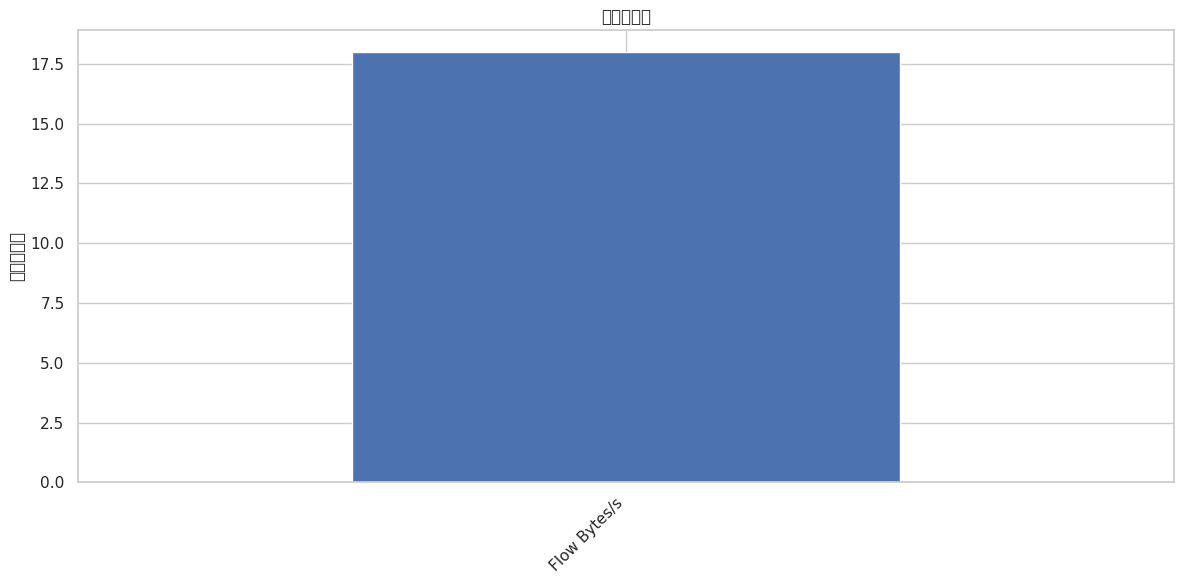


存在无穷值的列:
- Flow Bytes/s: 正无穷: 189, 负无穷: 0
-  Flow Packets/s: 正无穷: 207, 负无穷: 0


In [5]:
## 4. 检查缺失值和无穷值

# 检查缺失值
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if len(missing_values) > 0:
    print("\n缺失值情况:")
    print(missing_values)
    
    # 可视化缺失值
    plt.figure(figsize=(12, 6))
    missing_values.plot(kind='bar')
    plt.title('缺失值分布')
    plt.ylabel('缺失值数量')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\n没有发现缺失值")

# 检查无穷值
def check_infinite_values(df):
    """检查无穷值"""
    inf_count = {}
    
    for col in df.select_dtypes(include=[np.number]).columns:
        pos_inf = (df[col] == np.inf).sum()
        neg_inf = (df[col] == -np.inf).sum()
        
        if pos_inf > 0 or neg_inf > 0:
            inf_count[col] = {'positive_inf': pos_inf, 'negative_inf': neg_inf}
    
    return inf_count

inf_values = check_infinite_values(df)

if inf_values:
    print("\n存在无穷值的列:")
    for col, counts in inf_values.items():
        print(f"- {col}: 正无穷: {counts['positive_inf']}, 负无穷: {counts['negative_inf']}")
else:
    print("\n没有发现无穷值")


标签分布:
BENIGN          288566
Infiltration        36
Name:  Label, dtype: int64


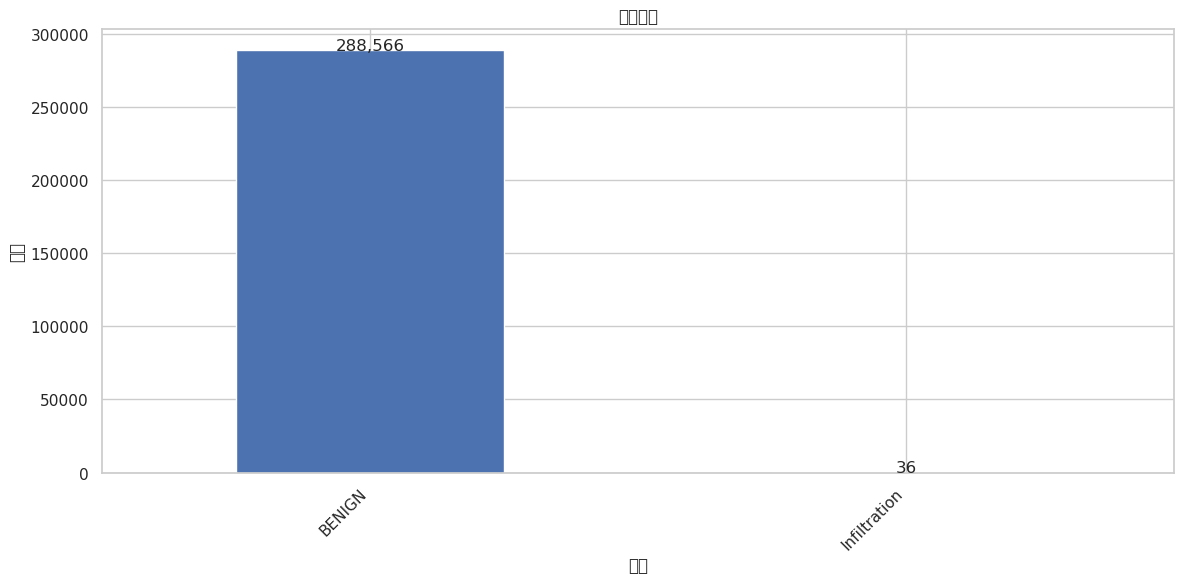

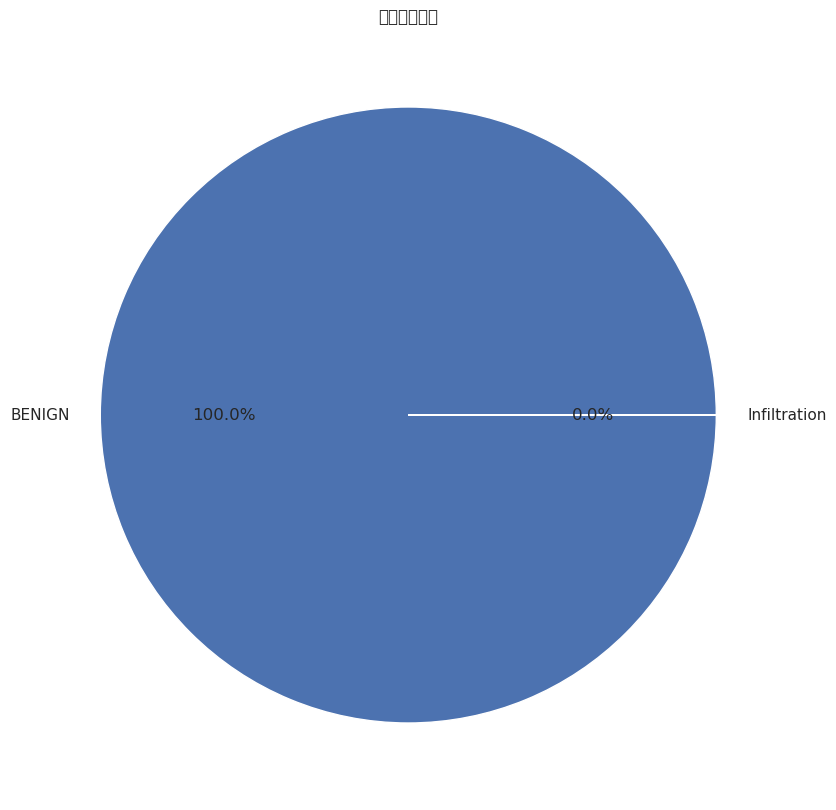

In [6]:
## 5. 标签分布分析

# 检查是否存在Label列
if ' Label' in df.columns:
    print("\n标签分布:")
    label_counts = df[' Label'].value_counts()
    print(label_counts)
    
    # 可视化标签分布
    plt.figure(figsize=(12, 6))
    label_counts.plot(kind='bar')
    plt.title('标签分布')
    plt.ylabel('数量')
    plt.xlabel('类别')
    plt.xticks(rotation=45, ha='right')
    
    # 在柱子上显示具体数值
    for i, v in enumerate(label_counts):
        plt.text(i, v + 10, f"{v:,}", ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # 饼图显示标签分布比例
    plt.figure(figsize=(10, 10))
    label_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('标签分布比例')
    plt.ylabel('')
    plt.show()
else:
    print("\n未发现标准标签列")


只选择前15个数值特征进行相关性分析 (共 78 个)

特征相关性分析:


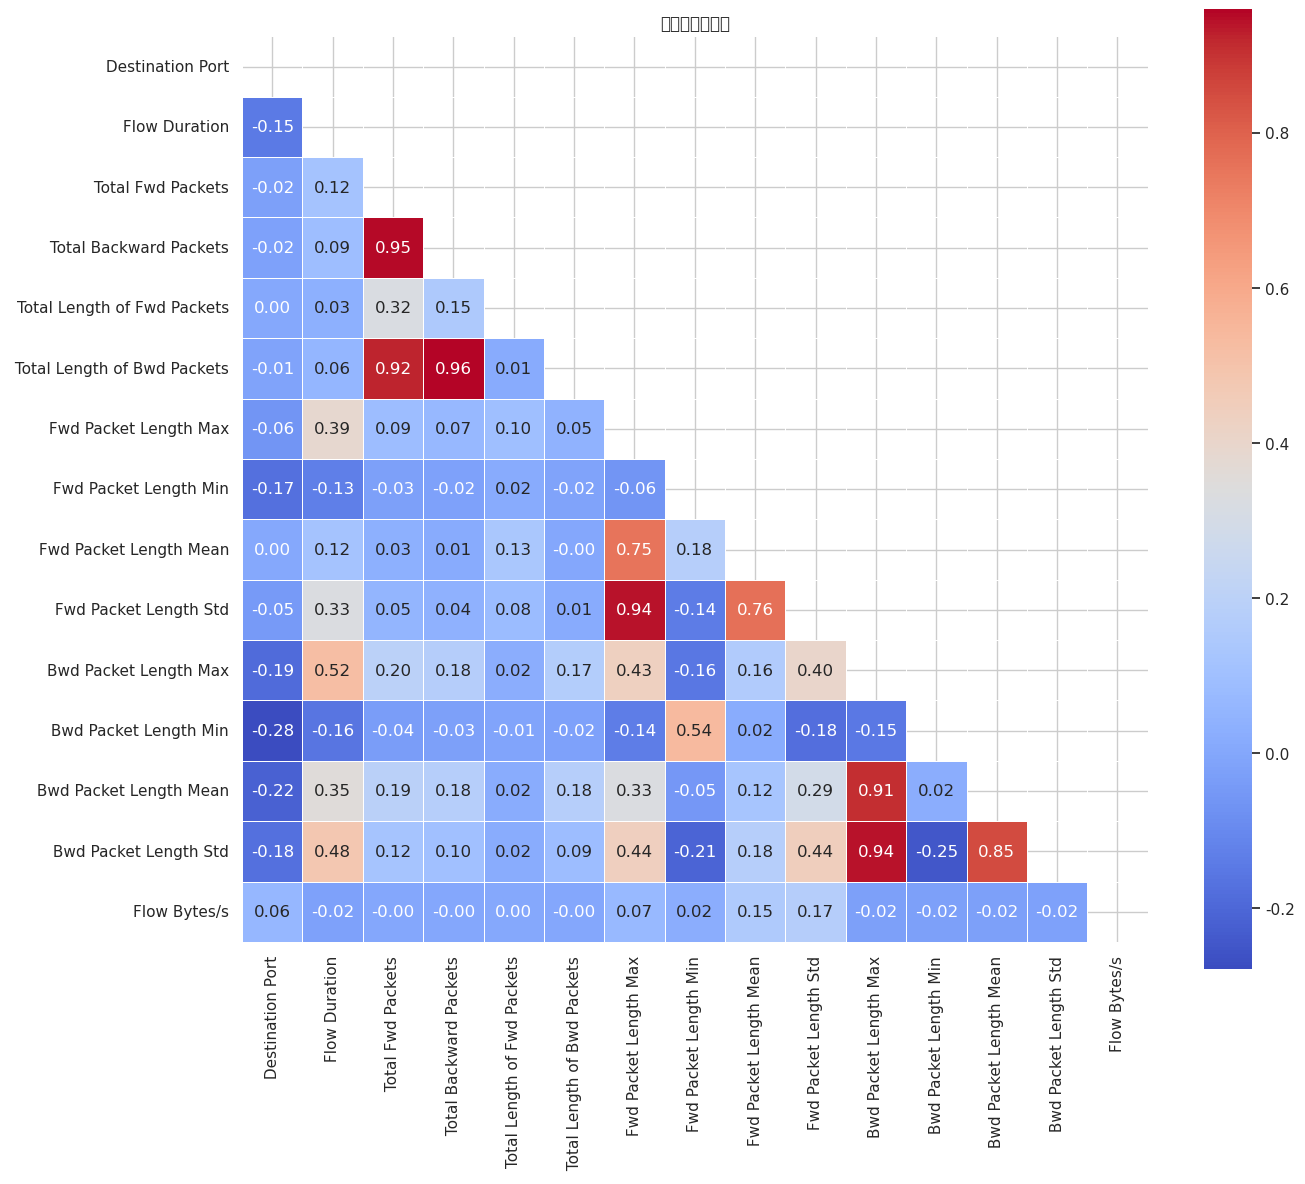


高度相关的特征对 (|相关系数| > 0.8):
-  Total Fwd Packets 和  Total Backward Packets: 0.95
-  Total Fwd Packets 和  Total Length of Bwd Packets: 0.92
-  Total Backward Packets 和  Total Length of Bwd Packets: 0.96
-  Fwd Packet Length Max 和  Fwd Packet Length Std: 0.94
- Bwd Packet Length Max 和  Bwd Packet Length Mean: 0.91
- Bwd Packet Length Max 和  Bwd Packet Length Std: 0.94
-  Bwd Packet Length Mean 和  Bwd Packet Length Std: 0.85


In [7]:
## 6. 特征相关性分析

# 选择数值型列
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 如果数值特征过多，只选择部分
if len(numeric_cols) > 15:
    print(f"\n只选择前15个数值特征进行相关性分析 (共 {len(numeric_cols)} 个)")
    numeric_cols = numeric_cols[:15]

# 计算相关性矩阵
if len(numeric_cols) > 1:
    print("\n特征相关性分析:")
    corr = df[numeric_cols].corr()
    
    # 绘制相关性热图
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
               square=True, linewidths=.5)
    plt.title('特征相关性热图')
    plt.tight_layout()
    plt.show()
    
    # 找出高度相关的特征
    high_corr = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.8:
                high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
    
    if high_corr:
        print("\n高度相关的特征对 (|相关系数| > 0.8):")
        for feat1, feat2, corr_val in high_corr:
            print(f"- {feat1} 和 {feat2}: {corr_val:.2f}")



特征分布分析:


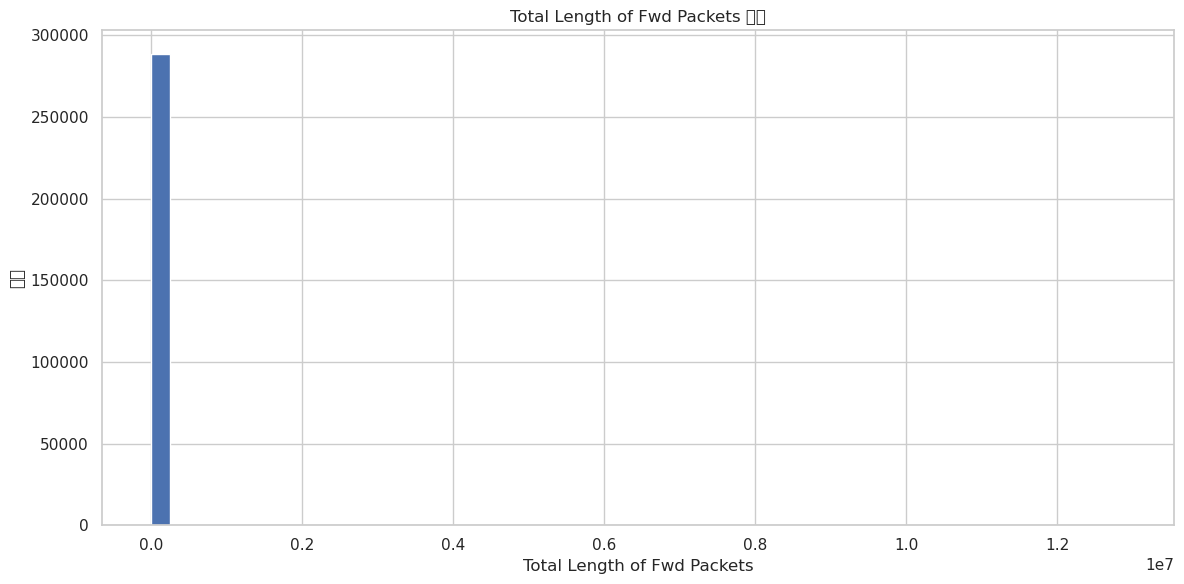

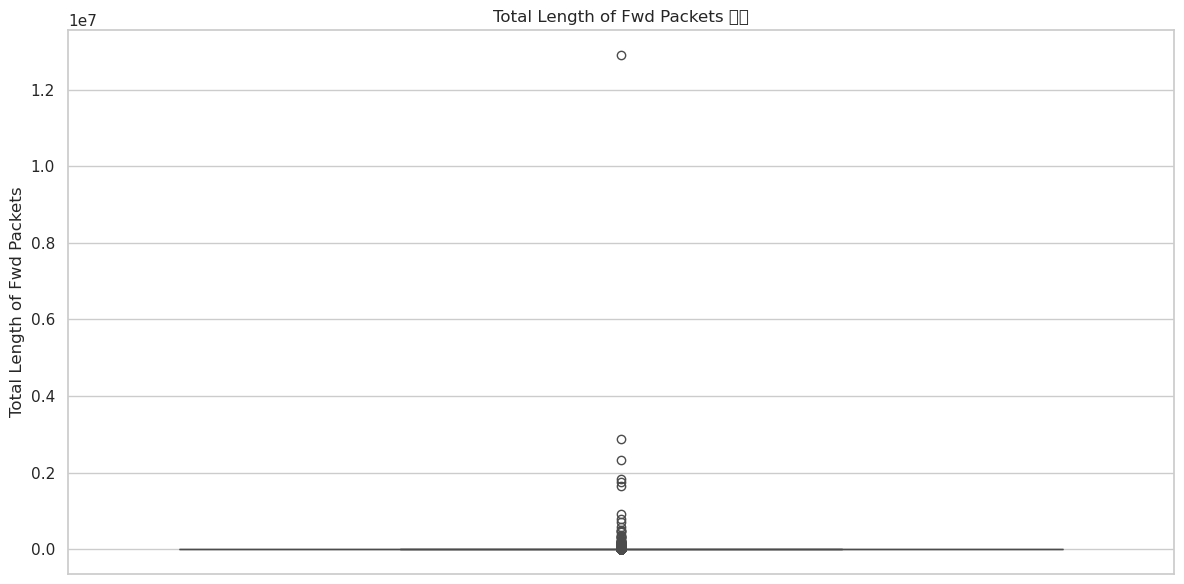

In [8]:
## 7. 特征分布分析

# 选择一些重要的数值特征进行分布分析
important_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
                     'Total Length of Fwd Packets', 'Total Length of Bwd Packets']

# 确保这些特征确实存在
available_features = [f for f in important_features if f in df.columns]

# 如果找不到预定义的重要特征，则选择前几个数值特征
if not available_features and len(numeric_cols) > 0:
    available_features = numeric_cols[:5]  # 只取前5个

if available_features:
    print("\n特征分布分析:")
    
    # 绘制直方图
    for feature in available_features:
        plt.figure(figsize=(12, 6))
        
        # 正常数据的分布 (如果有Label列)
        if 'Label' in df.columns:
            normal_data = df[df['Label'] == 'BENIGN'][feature]
            attack_data = df[df['Label'] != 'BENIGN'][feature]
            
            plt.hist(normal_data, bins=50, alpha=0.5, label='正常')
            plt.hist(attack_data, bins=50, alpha=0.5, label='攻击')
            plt.legend()
        else:
            plt.hist(df[feature], bins=50)
        
        plt.title(f'{feature} 分布')
        plt.xlabel(feature)
        plt.ylabel('频率')
        plt.tight_layout()
        plt.show()
        
        # 箱线图
        plt.figure(figsize=(12, 6))
        if 'Label' in df.columns:
            sns.boxplot(x='Label', y=feature, data=df)
            plt.title(f'{feature} 在不同类别的分布')
            plt.xticks(rotation=45, ha='right')
        else:
            sns.boxplot(y=feature, data=df)
            plt.title(f'{feature} 分布')
        plt.tight_layout()
        plt.show()